# "Analisis Pertumbuhan Penderita ADHD"
---
Muhamad Aditya Darmawan  (217006021)  
Ali Astra Mikaila  (217006103)  
Kelompok A-One / Rekayasa Data

---
# Import Library


In [1]:
import pandas as pd

#Data Analysis
import re
import nltk
# Ensure that the necessary NLTK datasets are downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix




#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Load Dataset**

In [2]:
# load data
data = pd.read_csv("https://media.githubusercontent.com/media/A-One-Team/ADHD-Analysis/main/data/adhd.csv")

# Display the first few rows of the dataset
data.head()

<ipython-input-2-ac16f43df6e9>:2: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://media.githubusercontent.com/media/A-One-Team/ADHD-Analysis/main/data/adhd.csv")


,title,selftext,score,id,url,num_comments,created_utc,created_datetime
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6,k348a,https://www.reddit.com/r/ADHD/comments/k348a/a...,7.0,1315014480.0,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,4,k3gdz,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,1.0,1315051084.0,2011-09-03 11:58:04
2,"New study shows that for people with ADHD, \n""...",NaN,22,k4q79,http://www.utexas.edu/features/2011/08/29/adhd...,11.0,1315174374.0,2011-09-04 22:12:54
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,6,k5fvd,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,10.0,1315239683.0,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,0,k6efi,https://www.reddit.com/r/ADHD/comments/k6efi/a...,0.0,1315317191.0,2011-09-06 13:53:11


# Data Preprocessing

## EDA and Data Cleaning

In [3]:
# melihat tipe data setiap kolom
data.dtypes

title                object
selftext             object
score                object
id                   object
url                  object
num_comments        float64
created_utc          object
created_datetime     object
dtype: object

In [4]:
# Melihat jumlah baris dan kolom
data.shape

(336066, 8)

In [5]:
# Melihat Missing Value
data.isna().sum()

title                  1
selftext            5143
score                 21
id                    21
url                   21
num_comments          21
created_utc           21
created_datetime      30
dtype: int64

In [6]:
# Dilihat kuantatitas value dataframe terlebih dahulu untuk nantinya dibandingkan

num_columns_b = data.shape[1]
num_rows_b = data.shape[0]
print(f"""Dimensi Dataframe Sebelum dibersihkan
Columns = {num_columns_b}
Rows = {num_rows_b}""")

Dimensi Dataframe Sebelum dibersihkan
Columns = 8
Rows = 336066


In [7]:
df_clean = data.dropna()

In [8]:
df_clean.isna().sum()

title               0
selftext            0
score               0
id                  0
url                 0
num_comments        0
created_utc         0
created_datetime    0
dtype: int64

In [9]:
data

,title,selftext,score,id,url,num_comments,created_utc,created_datetime
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6,k348a,https://www.reddit.com/r/ADHD/comments/k348a/a...,7.0,1315014480.0,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,4,k3gdz,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,1.0,1315051084.0,2011-09-03 11:58:04
2,"New study shows that for people with ADHD, \n""...",NaN,22,k4q79,http://www.utexas.edu/features/2011/08/29/adhd...,11.0,1315174374.0,2011-09-04 22:12:54
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,6,k5fvd,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,10.0,1315239683.0,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,0,k6efi,https://www.reddit.com/r/ADHD/comments/k6efi/a...,0.0,1315317191.0,2011-09-06 13:53:11
...,...,...,...,...,...,...,...,...
336061,Meds not working / lack of sleep to blame?,Hi everyone\n\nI started taking MPH 2 weeks ag...,1,lhjs50,https://www.reddit.com/r/ADHD/comments/lhjs50/...,2.0,1613046880.0,2021-02-11 12:34:40
336062,How to deal with friends who tell you to be ca...,[deleted],2,lhjvn6,https://www.reddit.com/r/ADHD/comments/lhjvn6/...,7.0,1613047275.0,2021-02-11 12:41:15
336063,"Atomoxetine side effects were too harsh, appre...",Hello everyone!\n\nI’ve been a part of this su...,1,lhk0yu,https://www.reddit.com/r/ADHD/comments/lhk0yu/...,2.0,1613047850.0,2021-02-11 12:50:50
336064,LTO3 experiences,[removed],2,lhk0z8,https://www.reddit.com/r/ADHD/comments/lhk0z8/...,0.0,1613047852.0,2021-02-11 12:50:52


In [10]:
# Drop column yang tidak akan digunakan
data = df_clean.drop(columns = ['id', 'created_utc'])
data.head()

,title,selftext,score,url,num_comments,created_datetime
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6,https://www.reddit.com/r/ADHD/comments/k348a/a...,7.0,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,4,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,1.0,2011-09-03 11:58:04
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,6,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,10.0,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,0,https://www.reddit.com/r/ADHD/comments/k6efi/a...,0.0,2011-09-06 13:53:11
5,Just started Concerta today any advice/experie...,"I am now 32, I was on Ritalin from the age of ...",7,https://www.reddit.com/r/ADHD/comments/k7t0t/j...,10.0,2011-09-07 17:46:52


In [11]:
# # Update column selftext menjadi post
# data.rename(columns={'selftext': 'post'}, inplace=True)

In [12]:
# Kalkulasikan jumlah karakter dari column title dan posts
data['len_title'] = data['title'].apply(lambda x: len(x) if pd.notnull(x) else 0)
data['len_post'] = data['selftext'].apply(lambda x: len(x) if pd.notnull(x) else 0)
data.head()

,title,selftext,score,url,num_comments,created_datetime,len_title,len_post
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6,https://www.reddit.com/r/ADHD/comments/k348a/a...,7.0,2011-09-03 01:48:00,41,988
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,4,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,1.0,2011-09-03 11:58:04,49,146
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,6,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,10.0,2011-09-05 16:21:23,34,677
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,0,https://www.reddit.com/r/ADHD/comments/k6efi/a...,0.0,2011-09-06 13:53:11,44,553
5,Just started Concerta today any advice/experie...,"I am now 32, I was on Ritalin from the age of ...",7,https://www.reddit.com/r/ADHD/comments/k7t0t/j...,10.0,2011-09-07 17:46:52,77,1062


In [13]:
# average title and post length
print(f'''Rata-rata Karakter Kolom Title = {(data['len_title']).mean().round()} characters''')
print(f'''Rata-rata Karakter Kolom Post = {(data['len_post']).mean().round()} characters''')

Rata-rata Karakter Kolom Title = 56.0 characters
Rata-rata Karakter Kolom Post = 532.0 characters


# **Implementasi Stopword Removal dan Lemmatization**

In [14]:
# Fungsi praprocessing text, extract, dan filter POS Tags
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Memisahkan kata kata dengan slash
    text = text.replace('/', ' ')

    # Penetapan dosis obat (contoh: 70mg, 150mg) dan 'tl;dr'
    dosages_and_phrases = re.findall(r'\b\d+mg\b|tl;dr', text)

    # Menghapus special characters kecuali tanda petk, spaso, and penetapan 'tl;dr'
    text = re.sub(r'(?<!tl);(?<!dr)|[^a-zA-Z\s\';]', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stopwords removal
    custom_words = ['something', 'im', 'dont', 'thing', 'going', 'getting', 'people',
                    'someone', 'everyone', 'nothing', 'ive', 'id', 'thank', 'thats',
                    'didnt', 'much', 'lot', 'isnt', 'stuff', 'right', 'sure', 'word',
                    'way', 'anything', 'everything', 'others', 'cant', "i'm", "don't",
                    "i've", "i'd", "that's", "didn't", "isn't", "can't", "s", "guy", "wa", "day", "week", "month"]
    stop_words = set(stopwords.words('english'))
    stop_words = stop_words.union(custom_words)
    filtered_tokens = [word for word in lemmatized_tokens if word not in stop_words]

    # POS tagging
    tagged_tokens = pos_tag(filtered_tokens)
    ground_truth_tags = ['VBG', 'VBN', 'NN', 'NNP', 'NNS', 'NNPS', 'JJ', 'JJR', 'JJS', 'RBR', 'POS']
    # Filter out tokens that are not relevant
    POS_text = [word for word, tag in tagged_tokens if tag in ground_truth_tags]

    # Reinsert dosages and phrases like 'tl;dr' into the text
    final_tokens = POS_text + dosages_and_phrases

    # Final text
    final_text = ' '.join(final_tokens)
    return final_text

In [15]:
# Preprosess text pada column (Mengasumsikan 'title' dan 'selftext' sebagai column yang relevan)
data['title'] = data['title'].apply(lambda x: preprocess_text(x))
data['post'] = data['selftext'].apply(lambda x: preprocess_text(x))

# Menampilkan kembali data teratas setelah dilakukan manipulasi
data.head()

,title,selftext,score,url,num_comments,created_datetime,len_title,len_post,post
0,android app strengthen attention focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6,https://www.reddit.com/r/ADHD/comments/k348a/a...,7.0,2011-09-03 01:48:00,41,988,hey r simple android app attention exercise ht...
1,anyone experience imipramine,My doctor has suggested it for ADD with anxiet...,4,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,1.0,2011-09-03 11:58:04,49,146,doctor ha add anxiety issue anyone
3,doe adhd test look,I'm 21 and didn't know about ADHD until recent...,6,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,10.0,2011-09-05 16:21:23,34,677,short found 's web parent think 's condition '...
4,good map direction,It seems like one thing I've always been reall...,0,https://www.reddit.com/r/ADHD/comments/k6efi/a...,0.0,2011-09-06 13:53:11,44,553,good learning place learning map little car ri...
5,started concerta today experience long time ad...,"I am now 32, I was on Ritalin from the age of ...",7,https://www.reddit.com/r/ADHD/comments/k7t0t/j...,10.0,2011-09-07 17:46:52,77,1062,ritalin age untill tremendous difficulty funct...


In [16]:
# Function to check if a cell is exactly 'deleted' or 'removed'
def check_exact_match(cell):
    return cell == '[deleted]' or cell == '[removed]'

columns_to_clean = ['title','post']
count_rows_b = data[data[columns_to_clean].applymap(check_exact_match).any(axis=1)].shape[0]

In [17]:
# Checking setelah data cleaning
num_columns_a = data.shape[1]
num_rows_a = data.shape[0]

print(f"""Dataframe Dimensions After Cleaning
Columns = {num_columns_a}
Rows = {num_rows_a}""")

print(f"""Difference
Rows = {((num_rows_a - num_rows_b)/((num_rows_a+num_rows_b)/2))*100:.2f}%""")

Dataframe Dimensions After Cleaning
Columns = 9
Rows = 330905
Difference
Rows = -1.55%


In [18]:
data.head(10)

,title,selftext,score,url,num_comments,created_datetime,len_title,len_post,post
0,android app strengthen attention focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6,https://www.reddit.com/r/ADHD/comments/k348a/a...,7.0,2011-09-03 01:48:00,41,988,hey r simple android app attention exercise ht...
1,anyone experience imipramine,My doctor has suggested it for ADD with anxiet...,4,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,1.0,2011-09-03 11:58:04,49,146,doctor ha add anxiety issue anyone
3,doe adhd test look,I'm 21 and didn't know about ADHD until recent...,6,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,10.0,2011-09-05 16:21:23,34,677,short found 's web parent think 's condition '...
4,good map direction,It seems like one thing I've always been reall...,0,https://www.reddit.com/r/ADHD/comments/k6efi/a...,0.0,2011-09-06 13:53:11,44,553,good learning place learning map little car ri...
5,started concerta today experience long time ad...,"I am now 32, I was on Ritalin from the age of ...",7,https://www.reddit.com/r/ADHD/comments/k7t0t/j...,10.0,2011-09-07 17:46:52,77,1062,ritalin age untill tremendous difficulty funct...
6,diagnosed adhd wrong diagnosis,I was diagnosed with adult adhd a couple of mo...,1,https://www.reddit.com/r/ADHD/comments/k9vzw/d...,1.0,2011-09-09 09:49:08,46,341,diagnosed adult adhd couple taking mg ritalin ...
7,tried adhd drug market help,[deleted],2,https://www.reddit.com/r/ADHD/comments/kayri/t...,1.0,2011-09-10 07:52:09,56,9,deleted
8,common problem relationship spouse related adhd,Just looking for some answers as to why they n...,11,https://www.reddit.com/r/ADHD/comments/kd570/w...,18.0,2011-09-12 15:31:52,104,64,looking answer last
9,,[deleted],6,https://www.reddit.com/r/ADHD/comments/kddr4/i...,9.0,2011-09-12 19:33:05,24,9,deleted
11,received prescription today curious,I looked at the bottle and it said D-Amphetami...,5,https://www.reddit.com/r/ADHD/comments/keolx/i...,9.0,2011-09-13 22:11:43,63,187,bottle amphetamine salt combo difference actua...


# **Evaluation Model**

In [19]:
# from sklearn.model_selection import train_test_split
# from nltk import pos_tag, word_tokenize
# from sklearn.metrics import accuracy_score, classification_report

# # Bagi data menjadi set pelatihan dan set pengujian
# x = data['selftext']  # Teks yang akan diproses
# y_true = data['post']  # Tag POS yang telah ditentukan
# X_train, X_test, y_train, y_test = train_test_split(x, y_true, test_size=0.2, random_state=42)

# # Tokenisasi dan POS tagging pada set pengujian
# y_pred = []
# for text in X_test:
#     tokens = word_tokenize(text)
#     pos_tags = [tag for _, tag in pos_tag(tokens)]
#     y_pred.append(pos_tags)

# # Evaluasi
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print("POS Tagging Evaluation Results:")
# print(f"Accuracy: {accuracy:.2f}")
# print("Classification Report:")
# print(report)


In [20]:
from sklearn.model_selection import train_test_split
from nltk import pos_tag, word_tokenize
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer

# Bagi data menjadi set pelatihan dan set pengujian
X = data['selftext']  # Teks yang akan diproses
y = data['post']  # Urutan tag POS yang telah ditentukan
X_train, X_test, y_train_sequences, y_test_sequences = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan fit MultiLabelBinarizer pada tag POS
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train_sequences)
y_test = mlb.transform(y_test_sequences)

# Tokenisasi dan POS tagging pada set pengujian
y_pred = []
for text in X_test:
    tokens = word_tokenize(text)
    pos_tags = [tag for _, tag in pos_tag(tokens)]
    y_pred.append(pos_tags)

# Evaluasi
accuracy = accuracy_score(mlb.transform(y_test), y_pred)
report = classification_report(mlb.transform(y_test), y_pred)

print("POS Tagging Evaluation Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) [0, 1] will be ignored
  warnings.warn(


ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead - the MultiLabelBinarizer transformer can convert to this format.

# **Data Visualization**

## Visualisasi dengan Word Cloud

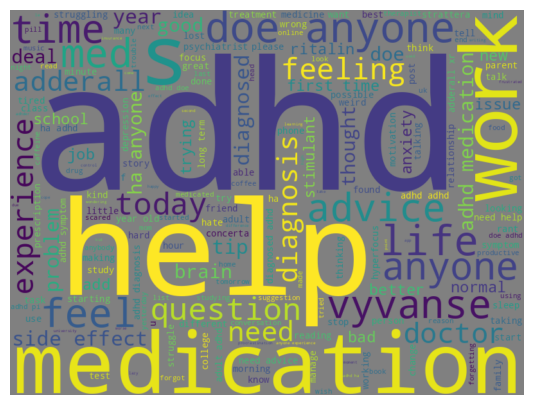

In [21]:
# Visualisasi kolom Title dengan Wordcloud
title_text = " ".join(data['title'].dropna().astype(str))

wordcloud = WordCloud(background_color="gray", width = 800, height = 600).generate(title_text)

# Menampilkan hasil generate wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

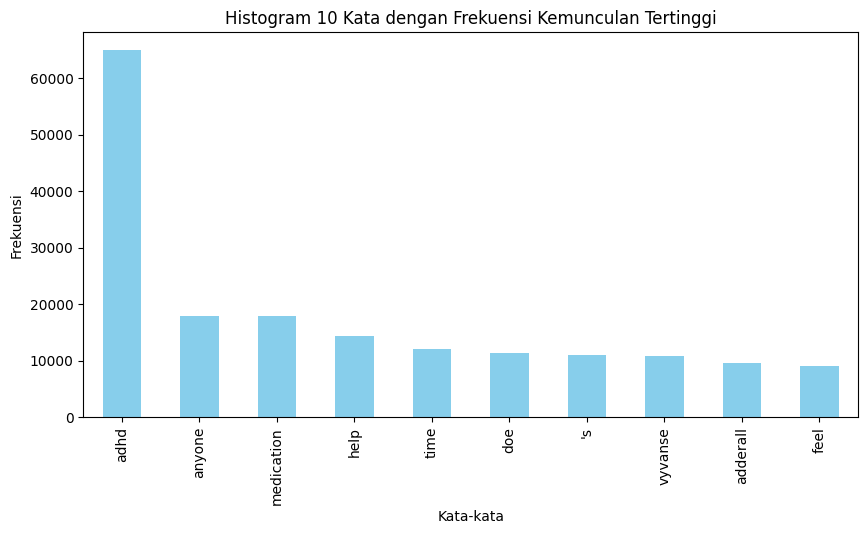

In [22]:
import matplotlib.pyplot as plt

# Menghitung frekuensi kemunculan kata-kata dalam kolom Title
title_text = data['title'].dropna().astype(str)
word_freq = title_text.str.split(expand=True).stack().value_counts()

# Mengambil 10 kata pertama dengan frekuensi tertinggi
top_10_words = word_freq.head(10)

# Menampilkan histogram dari 10 kata pertama
plt.figure(figsize=(10, 5))
top_10_words.plot(kind='bar', color='skyblue')
plt.xlabel('Kata-kata')
plt.ylabel('Frekuensi')
plt.title('Histogram 10 Kata dengan Frekuensi Kemunculan Tertinggi')
plt.show()


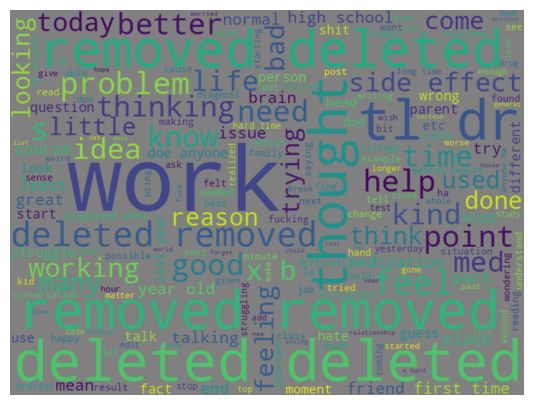

In [23]:
# Visualisasi column selftext atau post dengan Wordcloud
post_text = " ".join(data['post'].dropna().astype(str))

wordcloud = WordCloud(background_color="gray", width = 800, height = 600).generate(post_text)

# Menampilkan hasil generate wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Menghitung frekuensi kemunculan kata-kata dalam kolom post
post_text = data['post'].dropna().astype(str)
word_freq_post = post_text.str.split(expand=True).stack().value_counts()

# Mengambil 10 kata pertama dengan frekuensi tertinggi
top_10_words_post = word_freq_post.head(10)

# Menampilkan histogram dari 10 kata pertama
plt.figure(figsize=(10, 5))
top_10_words_post.plot(kind='bar', color='skyblue')
plt.xlabel('Kata-kata')
plt.ylabel('Frekuensi')
plt.title('Histogram 10 Kata Pertama dengan Frekuensi Tertinggi dalam Post')
plt.show()


In [ ]:
# Visualisasi semua text pada data dengan Wordcloud
all_text = title_text + post_text

wordcloud = WordCloud(background_color="gray", width = 800, height = 600).generate(all_text)

# Menampilkan hasil generate wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Menggabungkan teks dari kolom 'title' dan 'post'
all_text = title_text + " " + post_text

# Menghitung frekuensi kemunculan kata-kata dalam teks gabungan
word_freq_all = pd.Series(all_text.split()).value_counts()

# Mengambil 10 kata pertama dengan frekuensi tertinggi
top_10_words_all = word_freq_all.head(10)

# Menampilkan histogram dari 10 kata pertama
plt.figure(figsize=(10, 5))
top_10_words_all.plot(kind='bar', color='skyblue')
plt.xlabel('Kata-kata')
plt.ylabel('Frekuensi')
plt.title('Histogram 10 Kata Pertama dengan Frekuensi Tertinggi dari Seluruh Teks')
plt.show()
